In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

# 1 Prophet

## Apply Prophet, SARIMA, and Holt-Winters’ exponential smoothing to the Google trends vacation data set. The csv file is available on ePortal. Predict 12 months in the future. Don’t forget to use monthly time series

### Reading data

In [2]:
df=pd.read_csv('vacation.csv',index_col='Month',parse_dates=True)
df.index.freq='MS'
df

,Num_Search_Vacation
Month,
2004-01-01,94
2004-02-01,89
2004-03-01,86
2004-04-01,79
2004-05-01,89
...,...
2019-06-01,58
2019-07-01,56
2019-08-01,45


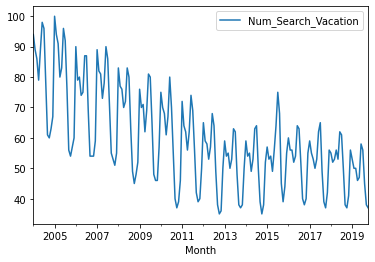

In [4]:
df.plot();

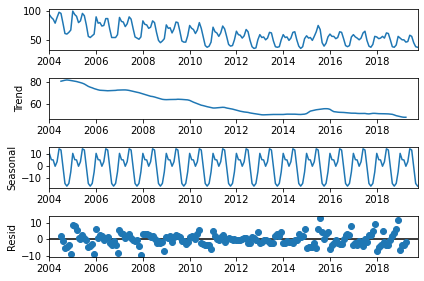

In [5]:
sdResult=seasonal_decompose(df)
sdResult.plot();

### SARIMAX

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

In [12]:
auto_arima(df, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=986.298, Time=2.76 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1402.455, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1254.545, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1400.635, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.23 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1005.637, Time=2.35 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=980.660, Time=1.89 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=2.06 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=1000.953, Time=2.84 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=979.239, Time=2.01 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=inf, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  190
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -481.653
Date:                                 Mon, 16 May 2022   AIC                            975.306
Time:                                         20:37:33   BIC                            994.757
Sample:                                              0   HQIC                           983.186
                                                 - 190                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6629      0.058     11.413      0.000       0.549       0.777
ma.L1         -0.9636      0.029    -33.221      0.000      -1.020      -0.907
ar.S.L12       0.9751      0.009    108.738      0.000       0.958       0.993
ma.S.L12      -0.4194      0.071     -5.923      0.000      -0.558      -0.281
ma.S.L24       0.1426      0.068      2.087      0.037       0.009       0.277
sigma2         8.1509      0.586     13.916      0.000       7.003       9.299
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                59.16
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               1.59   Skew:                             0.29
Prob(H) (two-sided):                  0.07   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
train = df.iloc[:-12]
test = df.iloc[-12:]
len(test)

12

In [28]:
model_sm = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1,0,1,12)).fit()

In [19]:
start = len(train)
end = start + len(test) - 1
predictions_sm = model_sm.predict(start=start, end=end, dynamic=False).rename('SARIMA')

<AxesSubplot:xlabel='Month'>

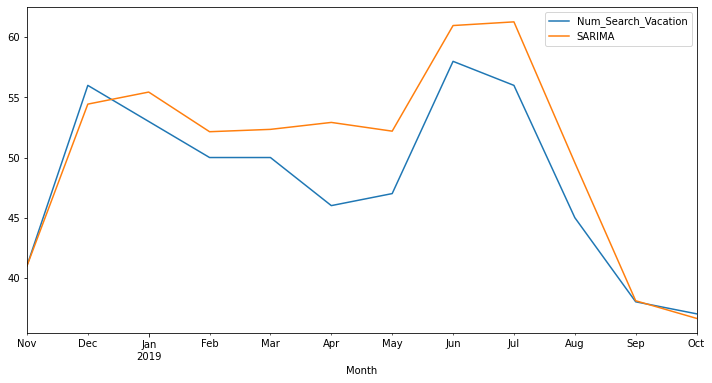

In [24]:
test.plot(figsize=(12,6), legend=True)
predictions_sm.plot(legend=True)

In [25]:
from sklearn.metrics import mean_absolute_percentage_error

In [26]:
mean_absolute_percentage_error(test, predictions_sm)

0.05708089876803343

### Predicting into the future

In [29]:
model_sm_future = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1,0,1,12)).fit()

In [100]:
predictions_sm_future = model_sm.predict(start=end, end=end+11, dynamic=False).rename('SARIMA Future')

<AxesSubplot:xlabel='Month'>

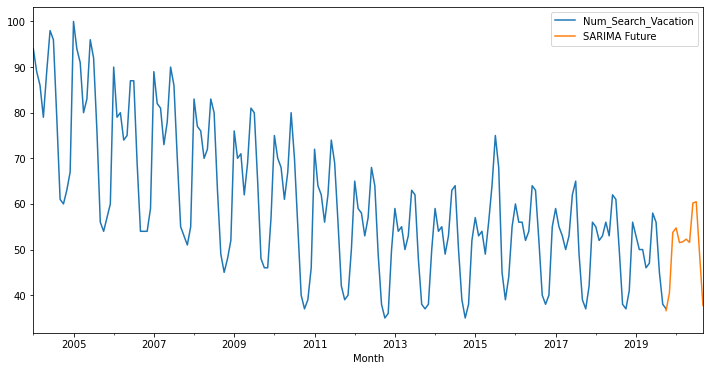

In [101]:
df.plot(figsize=(12,6), legend=True)
predictions_sm_future.plot(legend=True)

<AxesSubplot:xlabel='Month'>

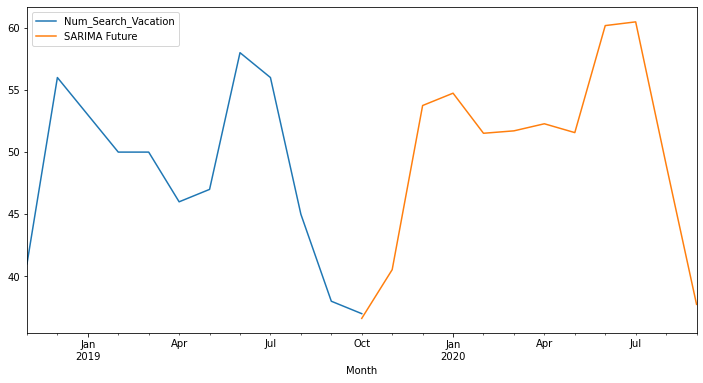

In [102]:
test.plot(figsize=(12,6), legend=True)
predictions_sm_future.plot(legend=True)

# Holt-Winters model

In [40]:
from statsmodels.tsa.api import ExponentialSmoothing

In [88]:
hw_fit = ExponentialSmoothing(train, trend='mul', seasonal='add',seasonal_periods=12).fit();

In [90]:
hw_fcast = hw_fit.forecast(len(test)).rename('HW Predict')

<AxesSubplot:xlabel='Month'>

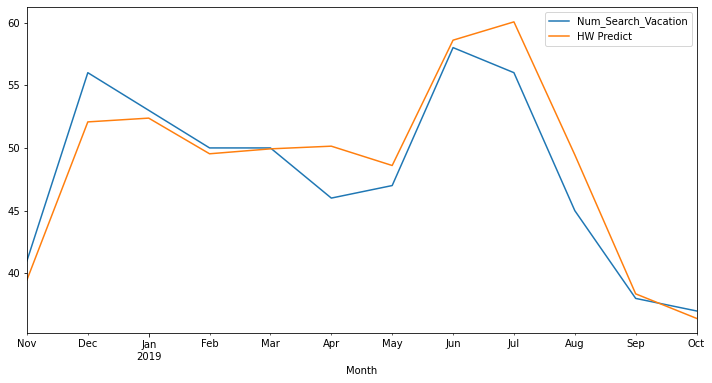

In [91]:
test.plot(figsize=(12,6), legend=True)
hw_fcast.plot(legend=True)

In [92]:
mean_absolute_percentage_error(test, hw_fcast)

0.03840699806188714

In [94]:
hw_fit_future = ExponentialSmoothing(df, trend='mul', seasonal='add',seasonal_periods=12).fit();

In [96]:
hw_fcast_future = hw_fit_future.forecast(12).rename('HW Predict Future')

<AxesSubplot:xlabel='Month'>

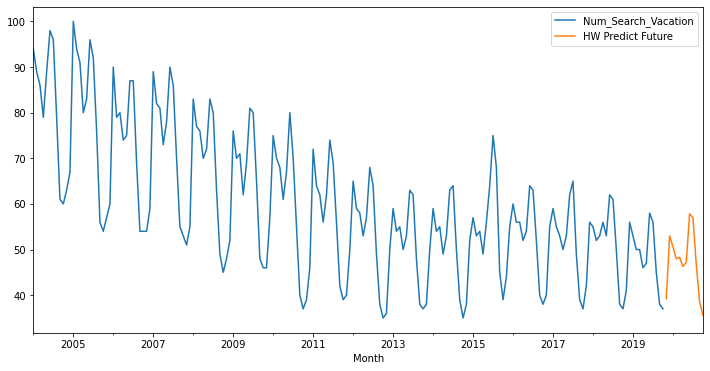

In [103]:
df.plot(figsize=(12,6), legend=True)
hw_fcast_future.plot(legend=True)

<AxesSubplot:xlabel='Month'>

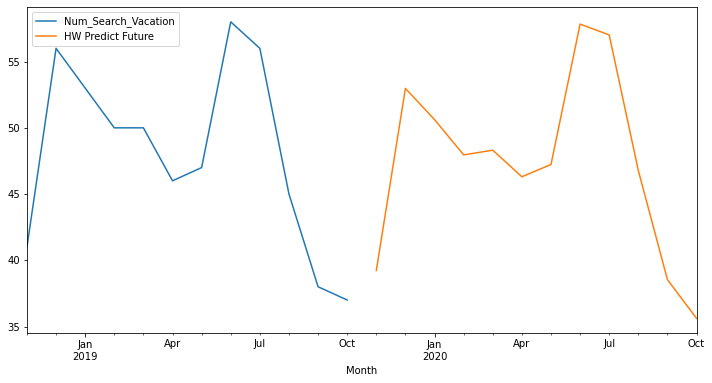

In [104]:
test.plot(figsize=(12,6), legend=True)
hw_fcast_future.plot(legend=True)

# Prophet

### Unfortunately, I was unable to install prophet due to some errors, so I'm unable to forecast data with this model

# Comparision of forecasts

<AxesSubplot:xlabel='Month'>

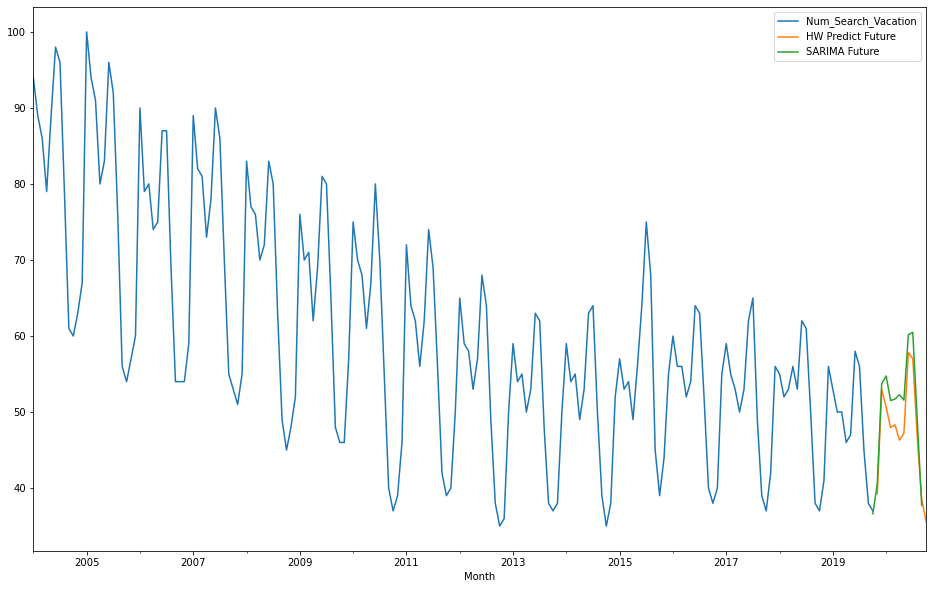

In [107]:
df.plot(figsize=(16,10), legend=True)
hw_fcast_future.plot(legend=True)
predictions_sm_future.plot(legend=True)

<AxesSubplot:xlabel='Month'>

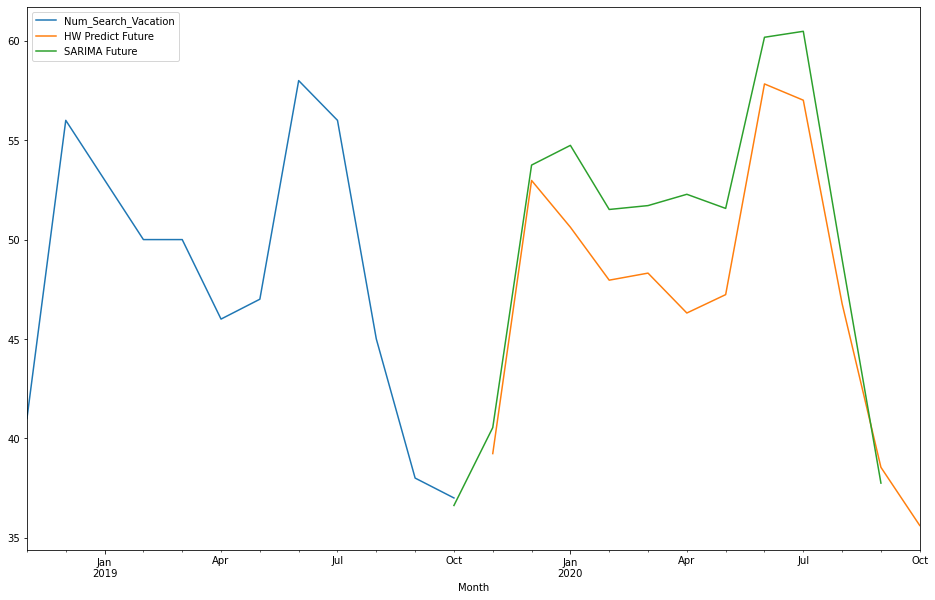

In [108]:
test.plot(figsize=(16,10), legend=True)
hw_fcast_future.plot(legend=True)
predictions_sm_future.plot(legend=True)

<AxesSubplot:>

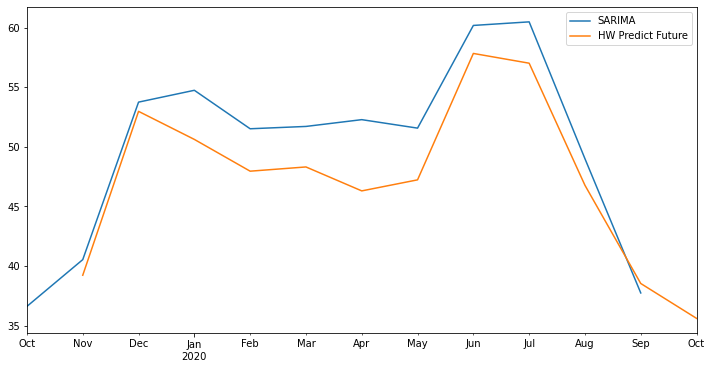

In [99]:
predictions_sm_future.plot(legend=True, figsize=(12,6))
hw_fcast_future.plot(legend=True)